# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you 
think through the steps.

Observations:
* As latitude increases, the trend appears to show a decrease in max temperature in the Northern Hemisphere.
* There is a strong negative correlation between latitude and the max temperature in the northern hemisphere. 
* There is a very weak positive correlation between latitude and cloudiness for the souther hemisphere.

In [6]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import weather API key
from api_keys import weather_api_key

# Getting city date - using long and lat
from citipy import citipy

# Output File (CSV)
output_data_file = "WeatherPy/cities.csv"

#Setting range for lat and long
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [7]:
# Creating variables to store lat and long combos and also creating variable to store cities
lat_long_rand = []
cities = []

# Create a set of random lat and lng combinations
latitude_rand = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitude_rand = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long_rand = zip(latitude_rand, longitude_rand)

# Identify nearest city for each lat long combo generated
for lat_long in lat_long_rand:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to list of cities
    if city not in cities:
        cities.append(city)

# Print count to confirm working code
len(cities)

635

In [8]:
# Creating lists to store values

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Looking for next value.")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : berlin
Processing Record 2 of Set 1 : tasiilaq
Processing Record 3 of Set 1 : bambous virieux
Processing Record 4 of Set 1 : yumen
Processing Record 5 of Set 1 : vila franca do campo
Processing Record 6 of Set 1 : mahebourg
City not found. Looking for next value.
Processing Record 7 of Set 1 : saskylakh
Processing Record 8 of Set 1 : vaini
Processing Record 9 of Set 1 : georgetown
Processing Record 10 of Set 1 : rikitea
Processing Record 11 of Set 1 : vestmanna
Processing Record 12 of Set 1 : lodja
Processing Record 13 of Set 1 : kodiak
Processing Record 14 of Set 1 : hobart
Processing Record 15 of Set 1 : narsaq
Processing Record 16 of Set 1 : yellowknife
Processing Record 17 of Set 1 : lebu
Processing Record 18 of Set 1 : punta arenas
Processing Record 19 of Set 1 : clyde river
Processing Record 20 of Set 1 : dzilam gonzalez
Processing Record 21 of Set 1 : mataura
City not found. Looking for next v

Processing Record 32 of Set 4 : oksfjord
Processing Record 33 of Set 4 : geraldton
Processing Record 34 of Set 4 : naraina
Processing Record 35 of Set 4 : marfino
Processing Record 36 of Set 4 : maniitsoq
Processing Record 37 of Set 4 : dolores
Processing Record 38 of Set 4 : kostyantynivka
Processing Record 39 of Set 4 : necochea
Processing Record 40 of Set 4 : swan hill
Processing Record 41 of Set 4 : lavrentiya
Processing Record 42 of Set 4 : tomatlan
Processing Record 43 of Set 4 : leeton
Processing Record 44 of Set 4 : pochutla
Processing Record 45 of Set 4 : guarapuava
Processing Record 46 of Set 4 : taltal
Processing Record 47 of Set 4 : bethel
Processing Record 48 of Set 4 : soyo
Processing Record 49 of Set 4 : constitucion
Processing Record 50 of Set 4 : leningradskiy
Processing Record 0 of Set 5 : czestochowa
Processing Record 1 of Set 5 : visby
Processing Record 2 of Set 5 : pisco
Processing Record 3 of Set 5 : noyabrsk
Processing Record 4 of Set 5 : san patricio
Processing 

Processing Record 19 of Set 8 : nikolskoye
Processing Record 20 of Set 8 : taveta
Processing Record 21 of Set 8 : mandla
Processing Record 22 of Set 8 : ancud
Processing Record 23 of Set 8 : kavos
Processing Record 24 of Set 8 : anadyr
Processing Record 25 of Set 8 : bourail
Processing Record 26 of Set 8 : taoudenni
Processing Record 27 of Set 8 : khandyga
Processing Record 28 of Set 8 : loikaw
Processing Record 29 of Set 8 : parfino
Processing Record 30 of Set 8 : lasa
Processing Record 31 of Set 8 : sydney
Processing Record 32 of Set 8 : mahibadhoo
Processing Record 33 of Set 8 : angoche
Processing Record 34 of Set 8 : cardston
Processing Record 35 of Set 8 : epe
Processing Record 36 of Set 8 : caravelas
Processing Record 37 of Set 8 : ghanzi
Processing Record 38 of Set 8 : chifeng
Processing Record 39 of Set 8 : esik
Processing Record 40 of Set 8 : tuatapere
Processing Record 41 of Set 8 : saraza
Processing Record 42 of Set 8 : pinega
City not found. Looking for next value.
Processi

Processing Record 45 of Set 11 : kreminna
Processing Record 46 of Set 11 : ouro branco
Processing Record 47 of Set 11 : almeirim
Processing Record 48 of Set 11 : mafinga
Processing Record 49 of Set 11 : jalu
Processing Record 50 of Set 11 : vavozh
Processing Record 0 of Set 12 : gat
Processing Record 1 of Set 12 : para de minas
Processing Record 2 of Set 12 : eenhana
Processing Record 3 of Set 12 : harnai
Processing Record 4 of Set 12 : mildura
Processing Record 5 of Set 12 : pontianak
Processing Record 6 of Set 12 : roberval
Processing Record 7 of Set 12 : viedma
Processing Record 8 of Set 12 : bathsheba
Processing Record 9 of Set 12 : naujamiestis
Processing Record 10 of Set 12 : riyadh
Processing Record 11 of Set 12 : chunskiy
Processing Record 12 of Set 12 : suoyarvi
Processing Record 13 of Set 12 : kananga
Processing Record 14 of Set 12 : casalpusterlengo
Processing Record 15 of Set 12 : san juan
Processing Record 16 of Set 12 : luderitz
Processing Record 17 of Set 12 : salinas
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create a data frame using data from above code by creating a dict
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

#count data above
weather_dict.count()

City          588
Cloudiness    588
Country       588
Date          588
Humidity      588
Lat           588
Lng           588
Max Temp      588
Wind Speed    588
dtype: int64

In [11]:
#view data frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Berlin,100,DE,1603248869,93,52.52,13.41,52.00,6.93
1,Tasiilaq,100,GL,1603248869,97,65.61,-37.64,32.00,18.34
2,Bambous Virieux,40,MU,1603248869,83,-20.34,57.76,77.00,10.29
3,Yumen,0,CN,1603248869,27,40.28,97.20,59.07,11.25
4,Vila Franca do Campo,20,PT,1603248870,72,37.72,-25.43,59.00,12.75
...,...,...,...,...,...,...,...,...,...
583,Bayir,75,TR,1603249073,82,37.27,28.22,60.80,3.36
584,Port-Cartier,20,CA,1603249025,84,50.03,-66.87,37.99,10.29
585,Grand Gaube,1,MU,1603248844,68,-20.01,57.66,77.00,8.99
586,Shamkhal,40,RU,1603249074,87,43.06,47.34,55.40,6.71


In [12]:
#Create output file into a csv file
weather_dict.to_csv("../WeatherPy/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#There were no records with humidity > 100% - SKIPPING

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

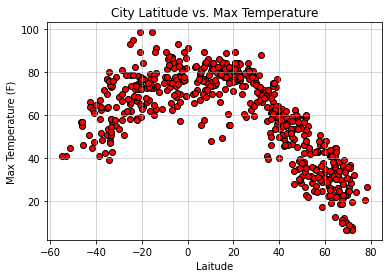

In [13]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "red", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

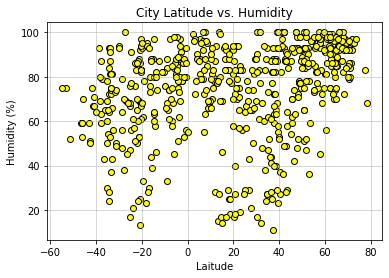

In [29]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "yellow", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

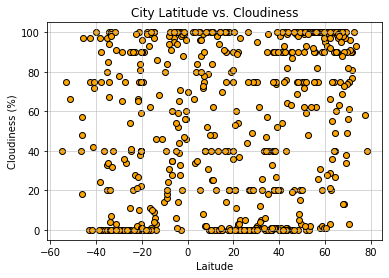

In [30]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "orange", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

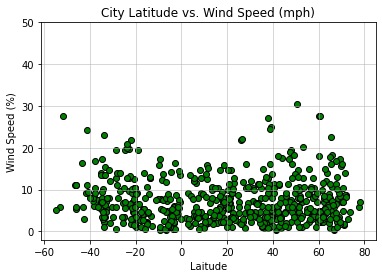

In [27]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "green", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [17]:
# Create DataFrames for both north and south hemi
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [18]:
#Creating linear agression and scatter plot - use define function
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

#Define function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


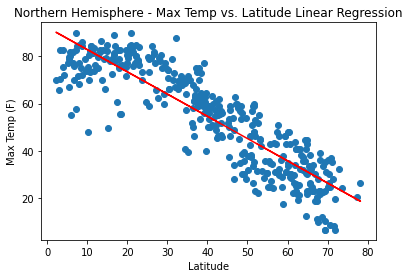

In [19]:
# Call on linear_regression
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
# Call on annotation
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.64


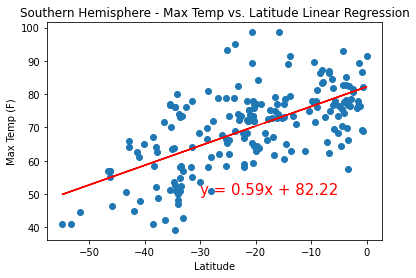

In [20]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.29


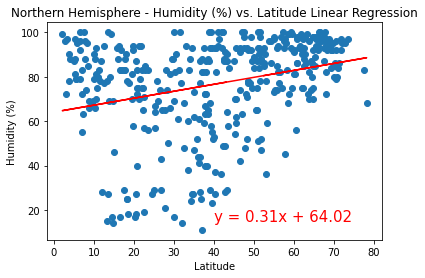

In [21]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.24


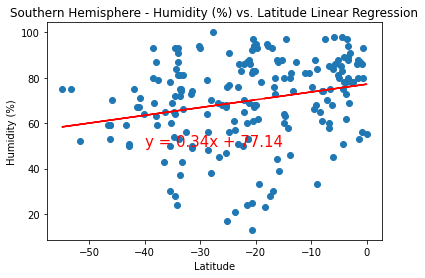

In [22]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.3


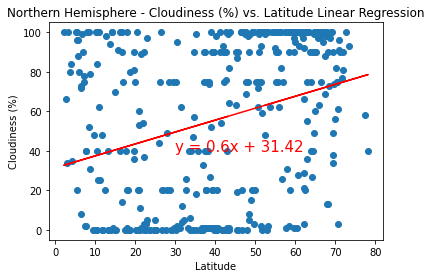

In [23]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.17


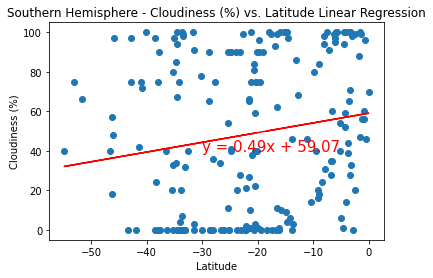

In [24]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


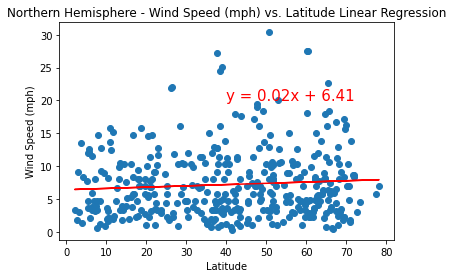

In [25]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.27


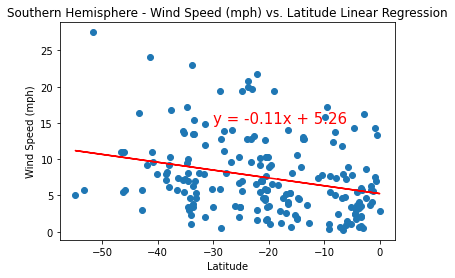

In [26]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")